In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the commodity price data
commodity_data = pd.read_csv('SoybeanFutures_ZS_CBT.csv')
commodity_data = commodity_data.rename(columns={'Date': 'DATE'})
commodity_data = commodity_data.set_index('DATE')

# Load the weather data for different locations
weather_data_arg = pd.read_csv('Argentina_Weather.csv', index_col='DATE')
weather_data_bra = pd.read_csv('Brazil_Weather.csv', index_col='DATE')
weather_data_cal = pd.read_csv('California_Weather.csv', index_col='DATE')
weather_data_ill = pd.read_csv('Illinois_Weather.csv', index_col='DATE')
weather_data_iow = pd.read_csv('Iowa_Weather.csv', index_col='DATE')
weather_data_min = pd.read_csv('Minnesota_Weather.csv', index_col='DATE')
weather_data_neb = pd.read_csv('Nebraska_Weather.csv', index_col='DATE')

In [3]:
commodity_data

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2018-01-02,956.50,960.00,949.50,955.00,955.00,2900
2018-01-03,956.25,960.50,955.00,959.75,959.75,2582
2018-01-04,959.25,960.00,950.25,959.25,959.25,2133
2018-01-05,960.00,966.50,960.00,961.50,961.50,1278
2018-01-08,960.75,962.25,951.50,958.25,958.25,988
...,...,...,...,...,...,...
2022-12-23,1468.75,1484.00,1466.25,1479.00,1479.00,52836
2022-12-27,1490.00,1516.75,1478.25,1482.25,1482.25,61925
2022-12-28,1483.50,1509.75,1482.75,1506.50,1506.50,42705


In [4]:
# Merge the commodity data and weather data into a single DataFrame
data_arg = pd.merge(commodity_data, weather_data_arg, on='DATE')
data_bra = pd.merge(commodity_data, weather_data_bra, on='DATE')
data_cal = pd.merge(commodity_data, weather_data_cal, on='DATE')
data_ill = pd.merge(commodity_data, weather_data_ill, on='DATE')
data_iow = pd.merge(commodity_data, weather_data_iow, on='DATE')
data_min = pd.merge(commodity_data, weather_data_min, on='DATE')
data_neb = pd.merge(commodity_data, weather_data_neb, on='DATE')

In [5]:
data_arg

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,956.50,960.00,949.50,955.00,955.00,2900,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,956.25,960.50,955.00,959.75,959.75,2582,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,959.25,960.00,950.25,959.25,959.25,2133,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,960.00,966.50,960.00,961.50,961.50,1278,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,960.75,962.25,951.50,958.25,958.25,988,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1468.75,1484.00,1466.25,1479.00,1479.00,52836,22.800000,43.5,1.0,0.137912,9.341758
2022-12-27,1490.00,1516.75,1478.25,1482.25,1482.25,61925,22.661798,36.7,2.7,0.023708,7.328090
2022-12-28,1483.50,1509.75,1482.75,1506.50,1506.50,42705,22.579070,37.6,0.7,0.067294,7.233721


In [6]:
train_data_arg = data_arg[:'2022-12']
test_data_arg = data_arg['2022-12':]

train_data_bra = data_bra[:'2022-12']
test_data_bra = data_bra['2022-12':]

train_data_cal = data_cal[:'2022-12']
test_data_cal = data_cal['2022-12':]

train_data_ill = data_ill[:'2022-12']
test_data_ill = data_ill['2022-12':]

train_data_iow = data_iow[:'2022-12']
test_data_iow = data_iow['2022-12':]

train_data_min = data_min[:'2022-12']
test_data_min = data_min['2022-12':]

train_data_neb = data_neb[:'2022-12']
test_data_neb = data_neb['2022-12':]


In [7]:
test_data_arg.shape

(21, 11)

In [8]:
# For ARG
exog_train_arg = train_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_arg = test_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For BRA
exog_train_bra = train_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_bra = test_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For CAL
exog_train_cal = train_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_cal = test_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For ILL
exog_train_ill = train_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_ill = test_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For IOW
exog_train_iow = train_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_iow = test_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For MIN
exog_train_min = train_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_min = test_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For NEB
exog_train_neb = train_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_neb = test_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]


In [24]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [ ]:
order = (2,1,2)
# For ARG
model_arg = sm.tsa.ARIMA(train_data_arg['Close'], order=order, exog=exog_train_arg)
result_arg = model_arg.fit()

# For BRA
model_bra = sm.tsa.ARIMA(train_data_bra['Close'], order=order, exog=exog_train_bra)
result_bra = model_bra.fit()

# For CAL
model_cal = sm.tsa.ARIMA(train_data_cal['Close'], order=order, exog=exog_train_cal)
result_cal = model_cal.fit()

# For ILL
model_ill = sm.tsa.ARIMA(train_data_ill['Close'], order=order, exog=exog_train_ill)
result_ill = model_ill.fit()

# For IOW
model_iow = sm.tsa.ARIMA(train_data_iow['Close'], order=order, exog=exog_train_iow)
result_iow = model_iow.fit()

# For MIN
model_min = sm.tsa.ARIMA(train_data_min['Close'], order=order, exog=exog_train_min)
result_min = model_min.fit()

# For NEB
model_neb = sm.tsa.ARIMA(train_data_neb['Close'], order=order, exog=exog_train_neb)
result_neb = model_neb.fit()


In [26]:
import matplotlib.pyplot as plt
# For ARG
pred_arg = result_arg.forecast(steps=21, exog=exog_test_arg)
pred_arg = pd.DataFrame(pred_arg[0], index=test_data_arg.index, columns=['Predictions_ARG'])

# For BRA
pred_bra = result_bra.forecast(steps=21, exog=exog_test_bra)
pred_bra = pd.DataFrame(pred_bra[0], index=test_data_bra.index, columns=['Predictions_BRA'])

# For CAL
pred_cal = result_cal.forecast(steps=21, exog=exog_test_cal)
pred_cal = pd.DataFrame(pred_cal[0], index=test_data_cal.index, columns=['Predictions_CAL'])

# For ILL
pred_ill = result_ill.forecast(steps=21, exog=exog_test_ill)
pred_ill = pd.DataFrame(pred_ill[0], index=test_data_ill.index, columns=['Predictions_ILL'])

# For IOW
pred_iow = result_iow.forecast(steps=21, exog=exog_test_iow)
pred_iow = pd.DataFrame(pred_iow[0], index=test_data_iow.index, columns=['Predictions_IOW'])

# For MIN
pred_min = result_min.forecast(steps=21, exog=exog_test_min)
pred_min = pd.DataFrame(pred_min[0], index=test_data_min.index, columns=['Predictions_MIN'])

# For NEB
pred_neb = result_neb.forecast(steps=21, exog=exog_test_neb)
pred_neb = pd.DataFrame(pred_neb[0], index=test_data_neb.index, columns=['Predictions_NEB'])




                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5310.339
Method:                       css-mle   S.D. of innovations             17.829
Date:                Fri, 07 Apr 2023   AIC                          10638.677
Time:                        23:07:10   BIC                          10684.747
Sample:                             1   HQIC                         10656.007
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.3722      2.553     -0.929      0.353      -7.375       2.631
Mean_Temp          0.2333      0.094      2.487      0.013       0.049       0.417
Mean_Precip        4.3512      4.712

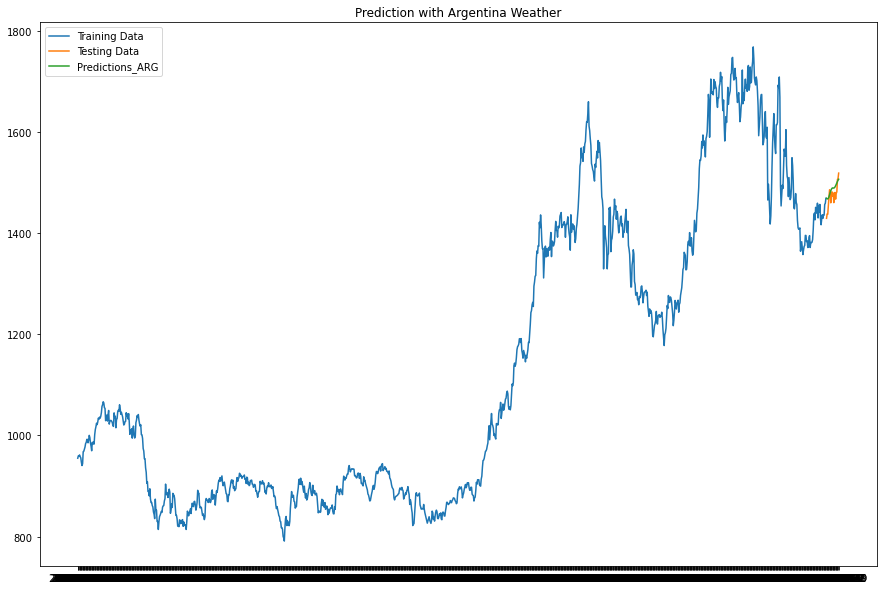

In [27]:
print(result_arg.summary())

# Plot the predicted values
plt.figure(figsize=(15, 10))

plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_arg.index, pred_arg['Predictions_ARG'], label='Predictions_ARG')

plt.title('Prediction with Argentina Weather')
plt.legend(loc='best')
plt.show()

In [46]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_arg['Predictions_ARG'])

0.2757999109207262

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5310.344
Method:                       css-mle   S.D. of innovations             17.829
Date:                Fri, 07 Apr 2023   AIC                          10638.687
Time:                        23:39:33   BIC                          10684.757
Sample:                             1   HQIC                         10656.017
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -13.5654      6.712     -2.021      0.043     -26.721      -0.410
Mean_Temp          0.7139      0.269      2.649      0.008       0.186       1.242
Mean_Precip        8.7234     37.274

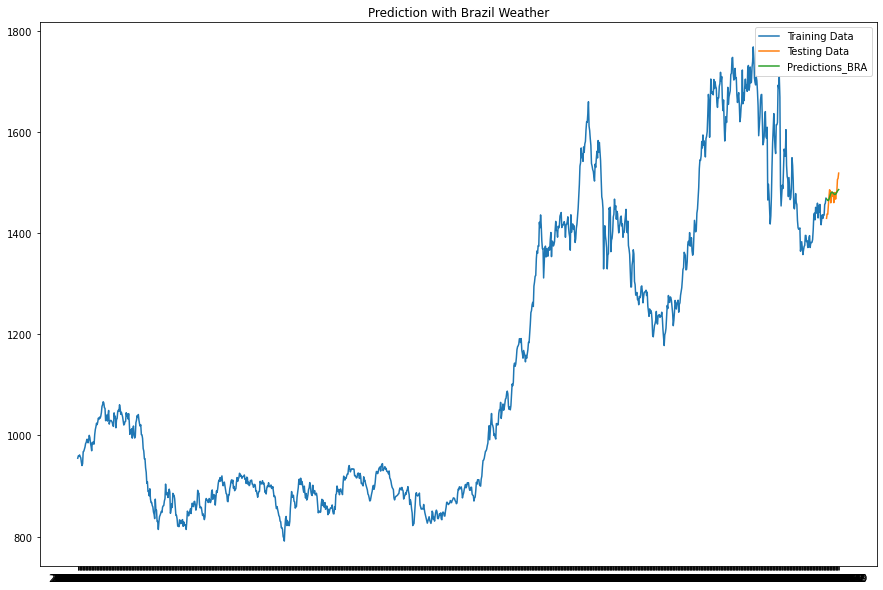

In [47]:
# Summary and plot for Brazil location
print(result_bra.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_bra.index, train_data_bra['Close'], label='Training Data')
plt.plot(test_data_bra.index, test_data_bra['Close'], label='Testing Data')
plt.plot(pred_bra.index, pred_bra['Predictions_BRA'], label='Predictions_BRA')

plt.title('Prediction with Brazil Weather')
plt.legend(loc='best')
plt.show()

In [44]:
from sklearn.metrics import r2_score
r2_score(test_data_bra['Close'], pred_bra['Predictions_BRA'])

0.37023333433754513

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1237
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5316.584
Method:                       css-mle   S.D. of innovations             17.795
Date:                Fri, 07 Apr 2023   AIC                          10651.169
Time:                        23:07:26   BIC                          10697.253
Sample:                             1   HQIC                         10668.502
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4986      2.178      2.984      0.003       2.230      10.767
Mean_Temp         -0.1879      0.093     -2.018      0.044      -0.370      -0.005
Mean_Precip        2.8765      6.723

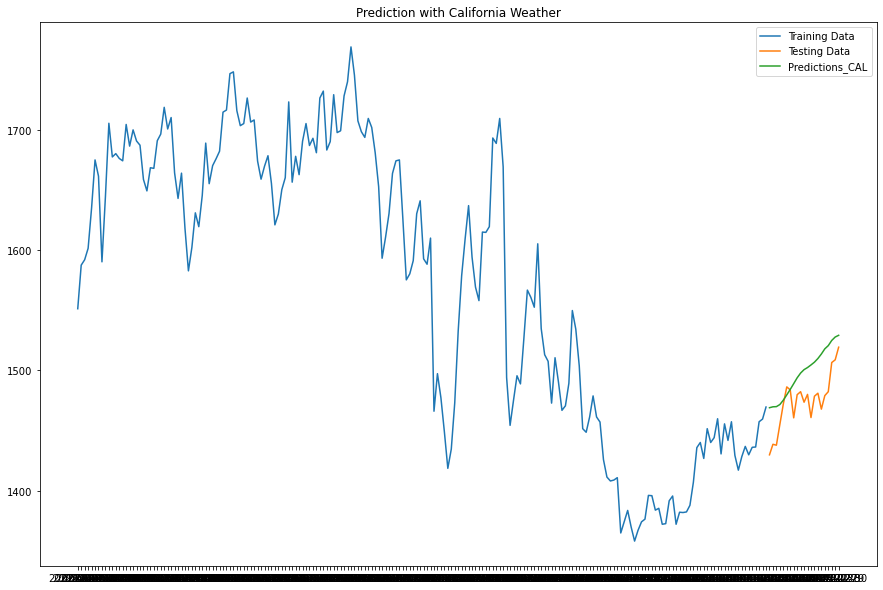

In [29]:
# Summary and plot for California location
print(result_cal.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_cal.index[-200:], train_data_cal['Close'][-200:], label='Training Data')
plt.plot(test_data_cal.index, test_data_cal['Close'], label='Testing Data')
plt.plot(pred_cal.index, pred_cal['Predictions_CAL'], label='Predictions_CAL')

plt.title('Prediction with California Weather')
plt.legend(loc='best')
plt.show()

In [43]:
from sklearn.metrics import r2_score
r2_score(test_data_cal['Close'], pred_cal['Predictions_CAL'])

-0.5538905978951125

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1237
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5314.238
Method:                       css-mle   S.D. of innovations             17.762
Date:                Fri, 07 Apr 2023   AIC                          10646.477
Time:                        23:07:28   BIC                          10692.561
Sample:                             1   HQIC                         10663.810
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3582      1.575      0.863      0.388      -1.728       4.444
Mean_Temp         -0.1392      0.050     -2.774      0.006      -0.237      -0.041
Mean_Precip        9.5247      3.438

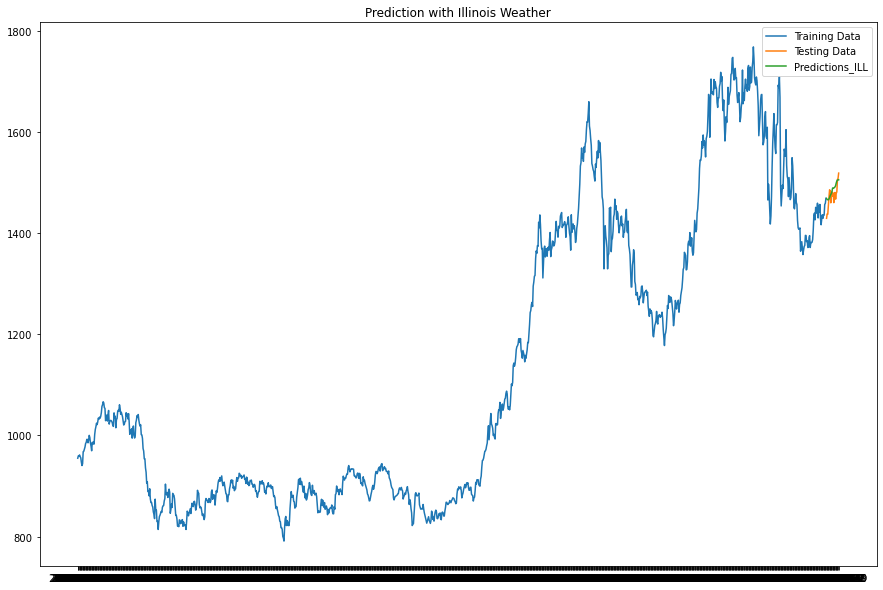

In [31]:
# Summary and plot for Illinois location
print(result_ill.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_ill.index, train_data_ill['Close'], label='Training Data')
plt.plot(test_data_ill.index, test_data_ill['Close'], label='Testing Data')
plt.plot(pred_ill.index, pred_ill['Predictions_ILL'], label='Predictions_ILL')

plt.title('Prediction with Illinois Weather')
plt.legend(loc='best')
plt.show()

In [42]:
from sklearn.metrics import r2_score
r2_score(test_data_ill['Close'], pred_ill['Predictions_ILL'])

0.29120038133185955

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1237
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5316.255
Method:                       css-mle   S.D. of innovations             17.791
Date:                Fri, 07 Apr 2023   AIC                          10650.510
Time:                        23:07:36   BIC                          10696.594
Sample:                             1   HQIC                         10667.843
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9573      1.523      1.285      0.199      -1.028       4.942
Mean_Temp         -0.1358      0.044     -3.104      0.002      -0.222      -0.050
Mean_Precip        4.4228      4.147

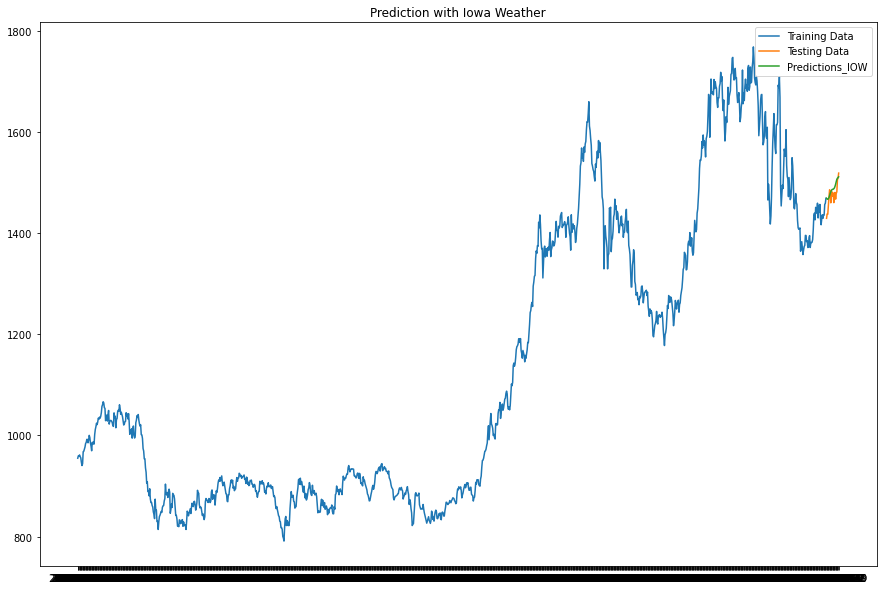

In [32]:
# Summary and plot for Iowa location
print(result_iow.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_iow.index, train_data_iow['Close'], label='Training Data')
plt.plot(test_data_iow.index, test_data_iow['Close'], label='Testing Data')
plt.plot(pred_iow.index, pred_iow['Predictions_IOW'], label='Predictions_IOW')

plt.title('Prediction with Iowa Weather')
plt.legend(loc='best')
plt.show()

In [41]:
from sklearn.metrics import r2_score
r2_score(test_data_iow['Close'], pred_iow['Predictions_IOW'])

0.2555953736499894

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1237
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5315.178
Method:                       css-mle   S.D. of innovations             17.775
Date:                Fri, 07 Apr 2023   AIC                          10648.355
Time:                        23:07:44   BIC                          10694.439
Sample:                             1   HQIC                         10665.689
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9937      1.380      1.445      0.149      -0.711       4.698
Mean_Temp         -0.1404      0.040     -3.526      0.000      -0.218      -0.062
Mean_Precip        5.5378      5.101

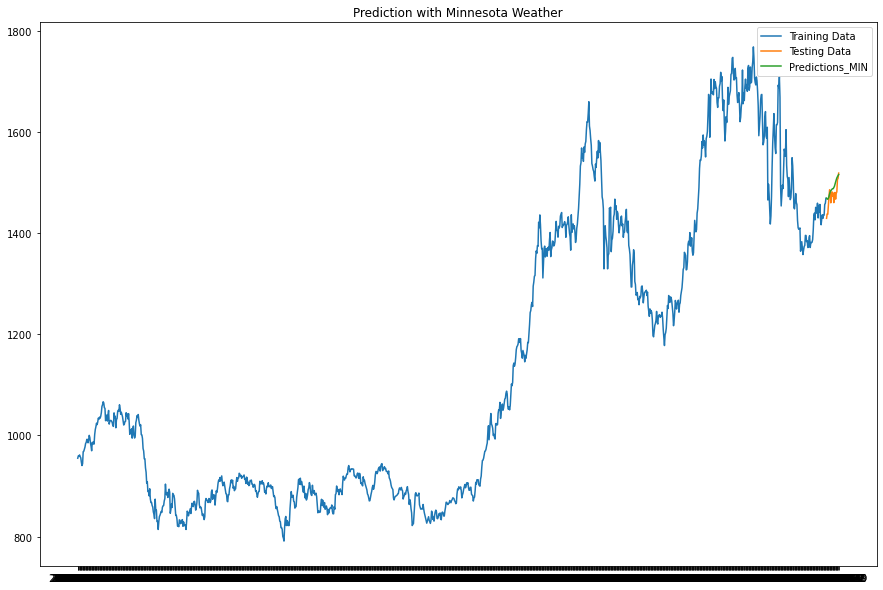

In [33]:
# Summary and plot for Minnesota location
print(result_min.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_min.index, train_data_min['Close'], label='Training Data')
plt.plot(test_data_min.index, test_data_min['Close'], label='Testing Data')
plt.plot(pred_min.index, pred_min['Predictions_MIN'], label='Predictions_MIN')

plt.title('Prediction with Minnesota Weather')
plt.legend(loc='best')
plt.show()

In [40]:
from sklearn.metrics import r2_score
r2_score(test_data_min['Close'], pred_min['Predictions_MIN'])

0.14759685693299185

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1237
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5315.825
Method:                       css-mle   S.D. of innovations             17.785
Date:                Fri, 07 Apr 2023   AIC                          10649.651
Time:                        23:07:52   BIC                          10695.735
Sample:                             1   HQIC                         10666.984
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5445      1.604      1.587      0.113      -0.599       5.688
Mean_Temp         -0.1460      0.044     -3.293      0.001      -0.233      -0.059
Mean_Precip        0.8382      4.129

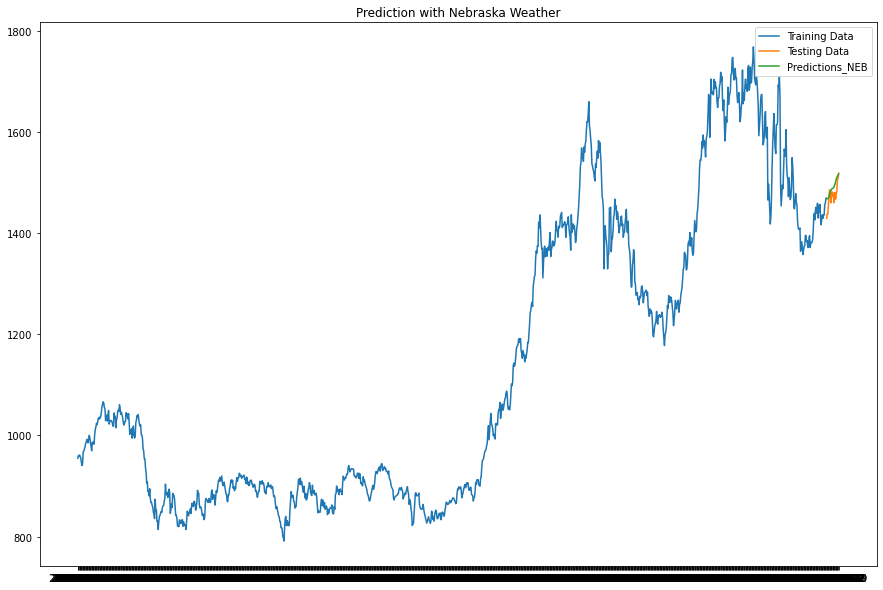

In [34]:
# Summary and plot for Nebraska location
print(result_neb.summary())

plt.figure(figsize=(15, 10))

plt.plot(train_data_neb.index, train_data_neb['Close'], label='Training Data')
plt.plot(test_data_neb.index, test_data_neb['Close'], label='Testing Data')
plt.plot(pred_neb.index, pred_neb['Predictions_NEB'], label='Predictions_NEB')

plt.title('Prediction with Nebraska Weather')
plt.legend(loc='best')
plt.show()

In [35]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred_neb['Predictions_NEB'])

0.10830699997532045

In [ ]:
# Concatenate weather data for all locations
exog_train_all = pd.concat([exog_train_arg.add_suffix('_arg'), exog_train_bra.add_suffix('_bra'), 
                            exog_train_cal.add_suffix('_cal'), exog_train_ill.add_suffix('_ill'), 
                            exog_train_iow.add_suffix('_iow'), exog_train_min.add_suffix('_min'), 
                            exog_train_neb.add_suffix('_neb')], axis=1)
exog_test_all = pd.concat([exog_test_arg, exog_test_bra, exog_test_cal, exog_test_ill, 
                           exog_test_iow, exog_test_min, exog_test_neb], axis=1)

exog_train_all.dropna(inplace=True)


# Fit the ARIMA model with exogenous variables
model = sm.tsa.ARIMA(train_data_arg['Close'], order=(2,1,2), exog=exog_train_all)

# Train the model
result = model.fit()

In [37]:
# Print the summary of the model
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5301.454
Method:                       css-mle   S.D. of innovations             17.702
Date:                Fri, 07 Apr 2023   AIC                          10656.908
Time:                        23:08:27   BIC                          10795.117
Sample:                             1   HQIC                         10708.896
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3592     11.253      0.032      0.975     -21.696      22.414
Mean_Temp_arg          0.1049      0.205      0.513      0.608      -0.296       0.506
Mean_Precip_arg     

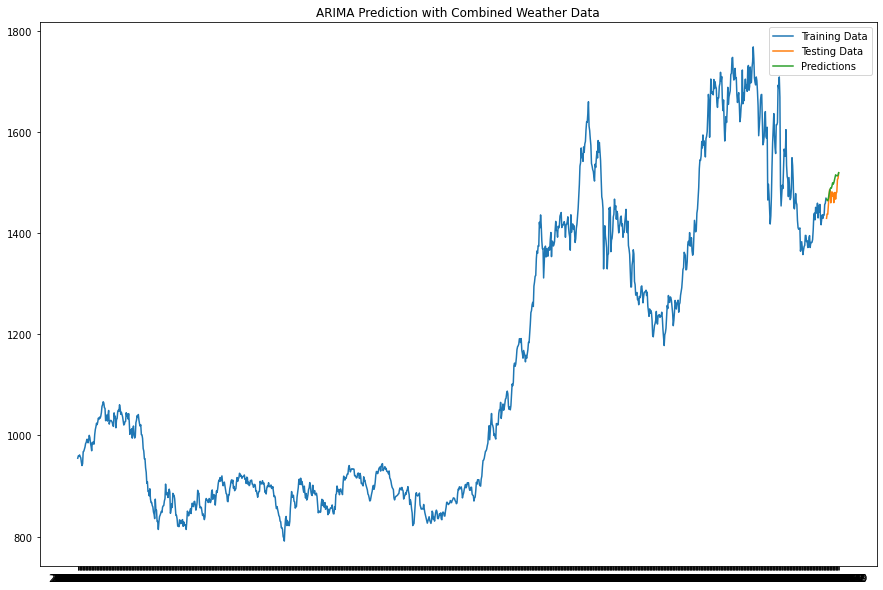

In [38]:
# Forecast
pred = result.forecast(steps=21, exog=exog_test_all)
pred = pd.DataFrame(pred[0], index=test_data_arg.index, columns=['Predictions_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred.index, pred['Predictions_ALL'], label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Prediction with Combined Weather Data')
plt.show()

In [39]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred['Predictions_ALL'])

-0.2853994304926173